# Ultimate Data Challenge

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Load data

In [2]:
logins = pd.read_json('logins.json')
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

Our column is already in datetime format, so now we just need to check for any null values and then aggregate.

In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


We have no null values! To pull off our aggregation, we will need to set the index to our time and make a count column (all 1s) in order to keep count of our times.

In [5]:
logins.set_index('login_time', inplace=True)
logins['count'] = 1

In [6]:
# use pd.resample()
logins15 = logins.resample('15T').sum()
logins15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [7]:
# Check for null count columns
logins15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


We went from 93142 to 9788 rows (10%). We can try and now visualize our data.

In [8]:
logins15.reset_index(inplace=True)

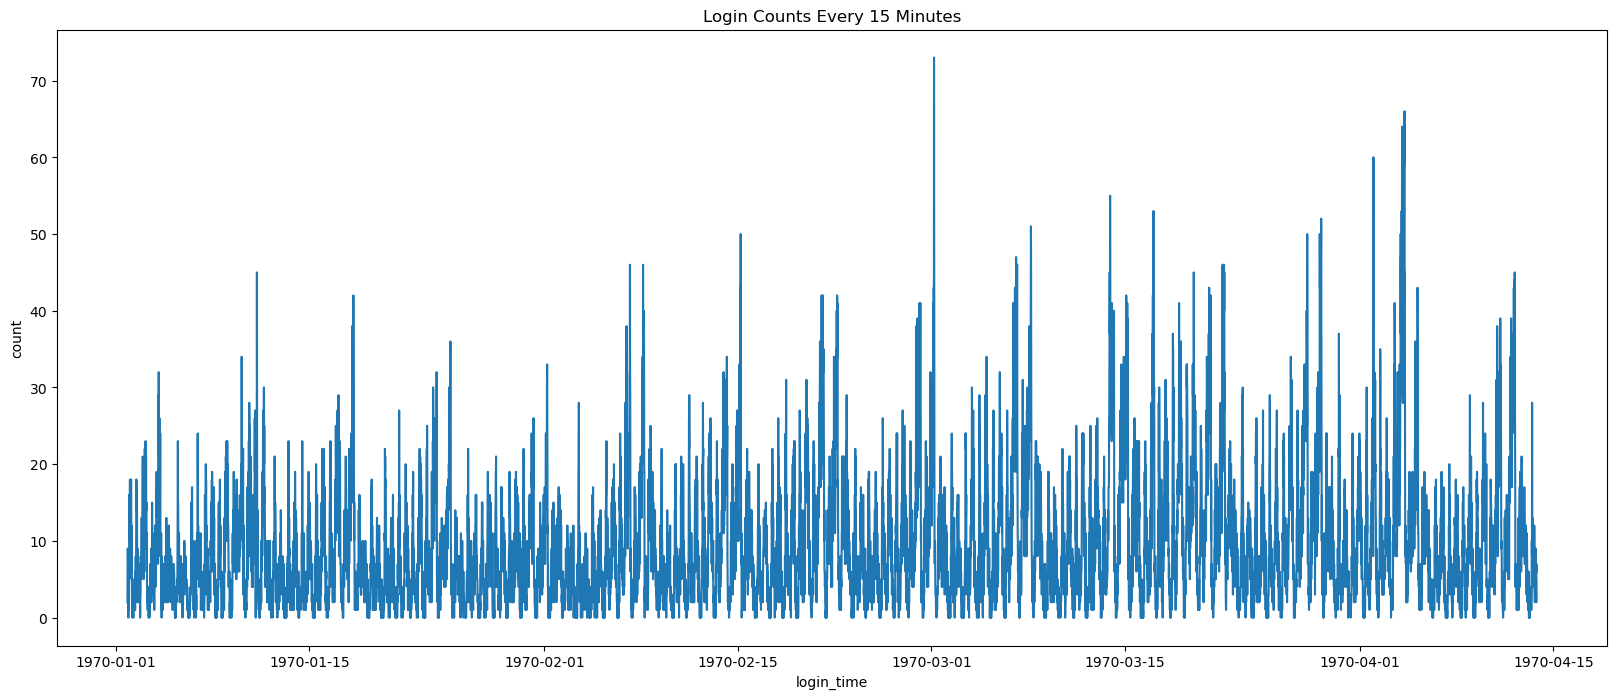

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x='login_time',y='count', data=logins15)
plt.title('Login Counts Every 15 Minutes')
plt.show()

It seems our data has slowly gone up over the months, but to best see this trend, we can look at the data from a daily / weekly scale instead. We also have spikes so we can try and inspect at what times / days these are happening.

In [10]:
logins15['month'] = logins15['login_time'].dt.month
logins15['day'] = logins15['login_time'].dt.day
logins15['week'] = logins15['login_time'].dt.isocalendar().week
logins15['weekday'] = logins15['login_time'].dt.weekday
logins15['hour'] = logins15['login_time'].dt.hour
logins15

,login_time,count,month,day,week,weekday,hour
0,1970-01-01 20:00:00,2,1,1,1,3,20
1,1970-01-01 20:15:00,6,1,1,1,3,20
2,1970-01-01 20:30:00,9,1,1,1,3,20
3,1970-01-01 20:45:00,7,1,1,1,3,20
4,1970-01-01 21:00:00,1,1,1,1,3,21
...,...,...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,4,13,16,0,17
9784,1970-04-13 18:00:00,5,4,13,16,0,18
9785,1970-04-13 18:15:00,2,4,13,16,0,18
9786,1970-04-13 18:30:00,7,4,13,16,0,18


Let's plot each of these graphs now.

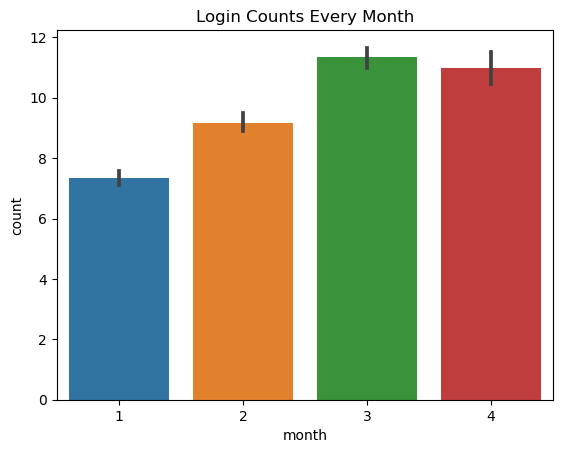

In [11]:
sns.barplot(x='month', y='count', data=logins15)
plt.title('Login Counts Every Month')
plt.show()

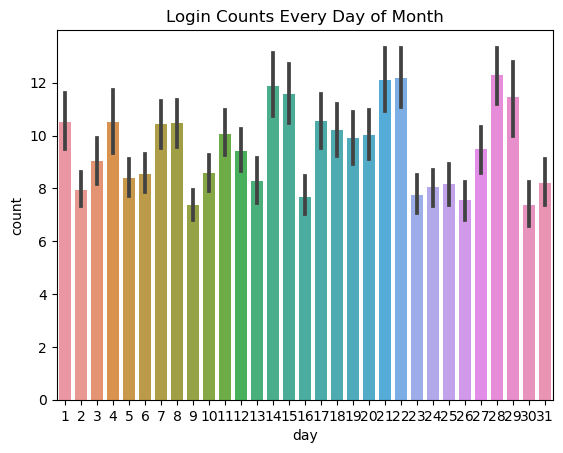

In [12]:
sns.barplot(x='day', y='count', data=logins15)
plt.title('Login Counts Every Day of Month')
plt.show()

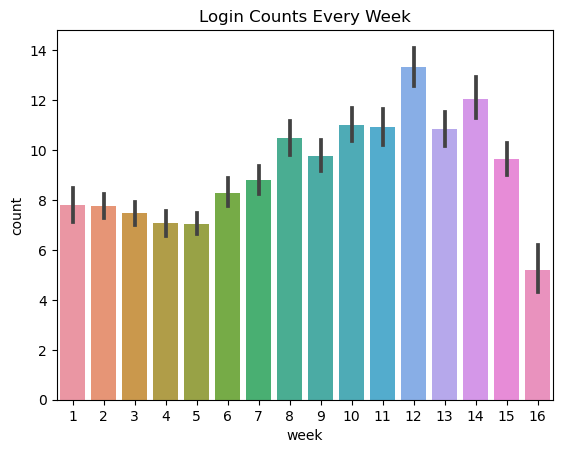

In [13]:
sns.barplot(x='week', y='count', data=logins15)
plt.title('Login Counts Every Week')
plt.show()

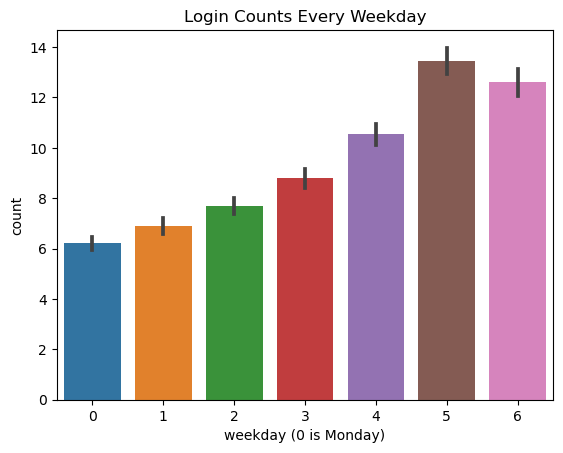

In [14]:
sns.barplot(x='weekday', y='count', data=logins15)
plt.title('Login Counts Every Weekday')
plt.xlabel('weekday (0 is Monday)')
plt.show()

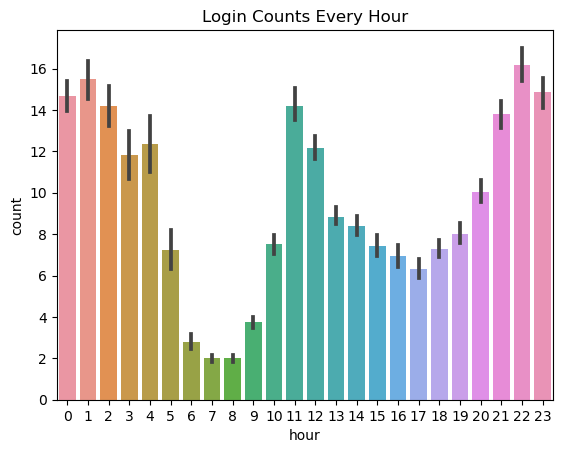

In [15]:
sns.barplot(x='hour', y='count', data=logins15)
plt.title('Login Counts Every Hour')
plt.show()

The logins definitly did go up over time. On the month and week barplot, our data may not seem like it was going up on the last column because our data gets cut off on a Monday in the middle of the month. Users also seem to login most on the weekends. The time of day also plays a factor as well. It seems the logins occur most during the hour periods of 23 to 4 of the next day. There seems to be a quiet period from 5 to 10 until users go for a quick check in the morning possibly from 11-12.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the
observation

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. The key metric I would choose for the success of this experiment are the driving partners that get reimbursed for their tolls. To check this, we can check a car's toll patterns before and after the toll reimbursment program in order to see that because of the toll change, the car has a higher rate of traveling between cities, especially during the active hours in each of the cities. By doing so, we can use the higher rate of traveling change to implement the toll reimbursement during certain hours of the day in order to maximize profits in the long run.

2. To implement this experiment, we will need to track our drivers who are recieving the toll reimbursment. We will want to track at what times and which direction the driver went when traveling between cities. We will implement a t test in order to verify the significance of the obersvation. To interpret the results, we would be most curious in the data that is during the active hours of one city and seeing if drivers are going from their own city to the active one because the toll has been reimbursed. When it comes to recommendations to the city, we can use these results to see if the toll reimbursements should only happen at set hours in order to maximize profits.

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

### Load Data

In [16]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We need to fix these rows / columns. We can first drop the rows with null phone values as we can not predict which phone the user has. We can then plug in the mean average of ratings in the avg rating columns.

In [18]:
df = df.drop(df[df['phone'].isna() == True].index, axis=0)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


We also need to convert our sign up and last trip date columns into datetime format. We also want to convert our bool column into float type for better modeling later.

In [20]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
#df['ultimate_black_user'] = df['ultimate_black_user'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [21]:
dfSort = df.sort_values(by='last_trip_date')
dfSort

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
38794,Astapor,1,2014-01-01,4.601467,1.00,2014-01-01,iPhone,0.0,False,100.0,1.69,5.0
26039,Winterfell,1,2014-01-01,4.601467,1.00,2014-01-01,Android,0.0,True,100.0,16.17,5.0
33241,Winterfell,1,2014-01-01,4.000000,1.00,2014-01-01,iPhone,0.0,False,100.0,6.83,3.0
31650,Astapor,1,2014-01-01,4.601467,2.00,2014-01-01,iPhone,100.0,True,100.0,5.06,5.0
3788,Astapor,1,2014-01-01,4.601467,1.00,2014-01-01,Android,0.0,True,100.0,2.98,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45516,King's Landing,2,2014-01-25,4.400000,1.14,2014-07-01,Android,17.9,False,83.9,2.32,4.8
12139,King's Landing,16,2014-01-18,4.900000,1.02,2014-07-01,Android,3.9,False,74.0,2.64,4.8
18814,Astapor,3,2014-01-10,4.700000,1.02,2014-07-01,iPhone,3.2,False,67.7,6.22,4.8
12085,Winterfell,1,2014-01-24,4.700000,1.04,2014-07-01,iPhone,15.4,True,38.5,6.80,4.9


An active user defines those who took a trip within the preceding 30 days. Our signup data is all from January while our last trip date data goes until July 1st. We can infer that the 6th month refers to July and that the first month refers to February as that would give a full 30 days for the "1st" month to track active users.

In [22]:
last_date = df['last_trip_date'].max()
# check to see if last date is 30 or more days longer than last trip date
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (last_date - date).days > 30 else 1)
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601467,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


### EDA

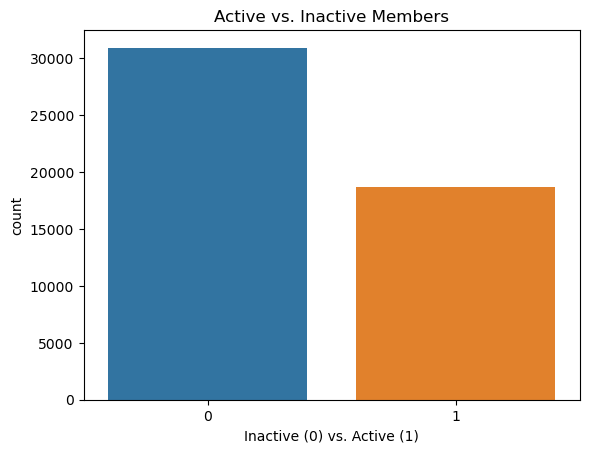

In [23]:
sns.countplot(x='active', data=df)
plt.title('Active vs. Inactive Members')
plt.xlabel('Inactive (0) vs. Active (1)')
plt.show()

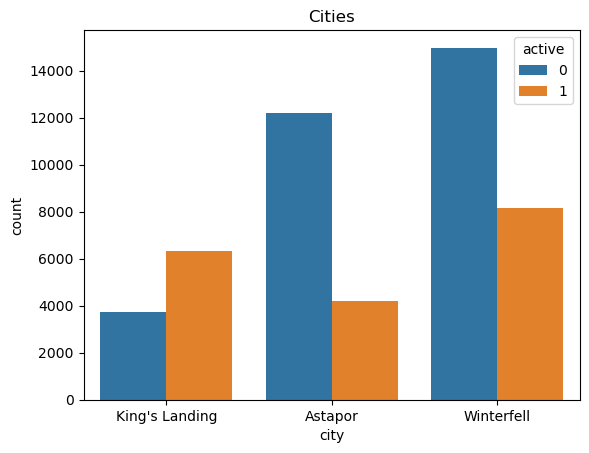

In [24]:
sns.countplot(x='city', data=df, hue='active')
plt.title('Cities')
plt.show()

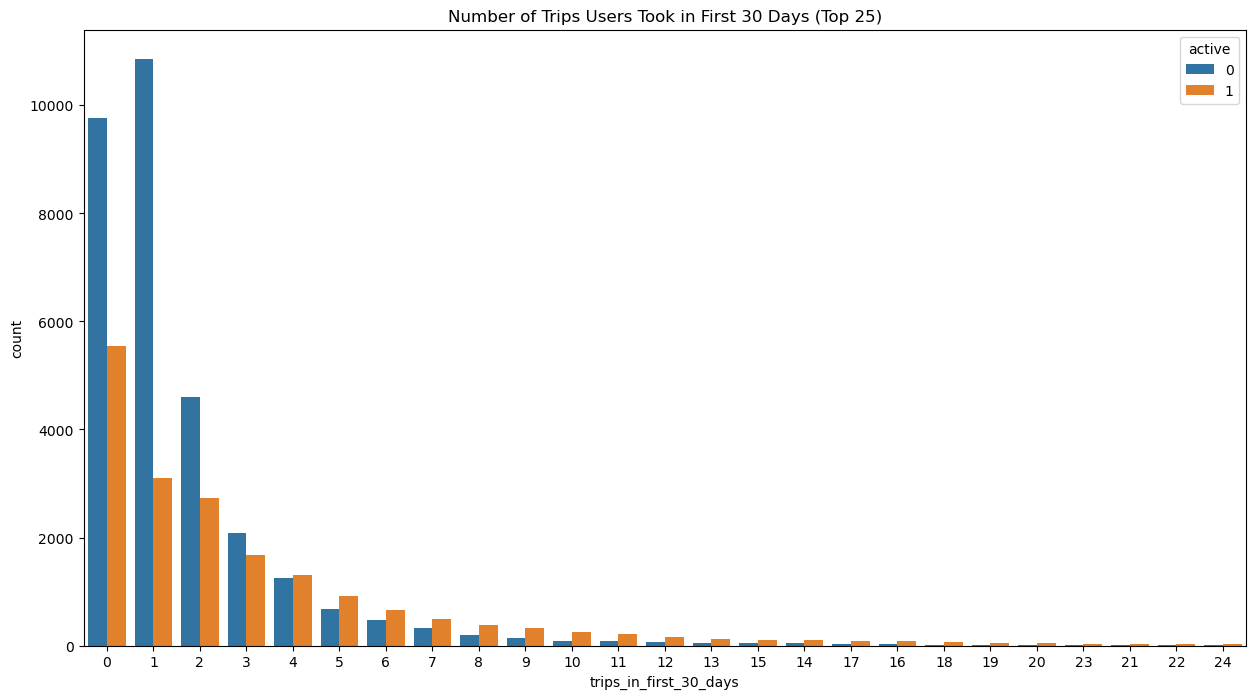

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='trips_in_first_30_days', data=df, hue='active', order=df.trips_in_first_30_days.value_counts().iloc[:25].index)
plt.title('Number of Trips Users Took in First 30 Days (Top 25)')
plt.show()

We can see from this graph that if users take at least 4 trips within their first 30 days of signup, there is a higher chance that they will stay active in the 6th month.

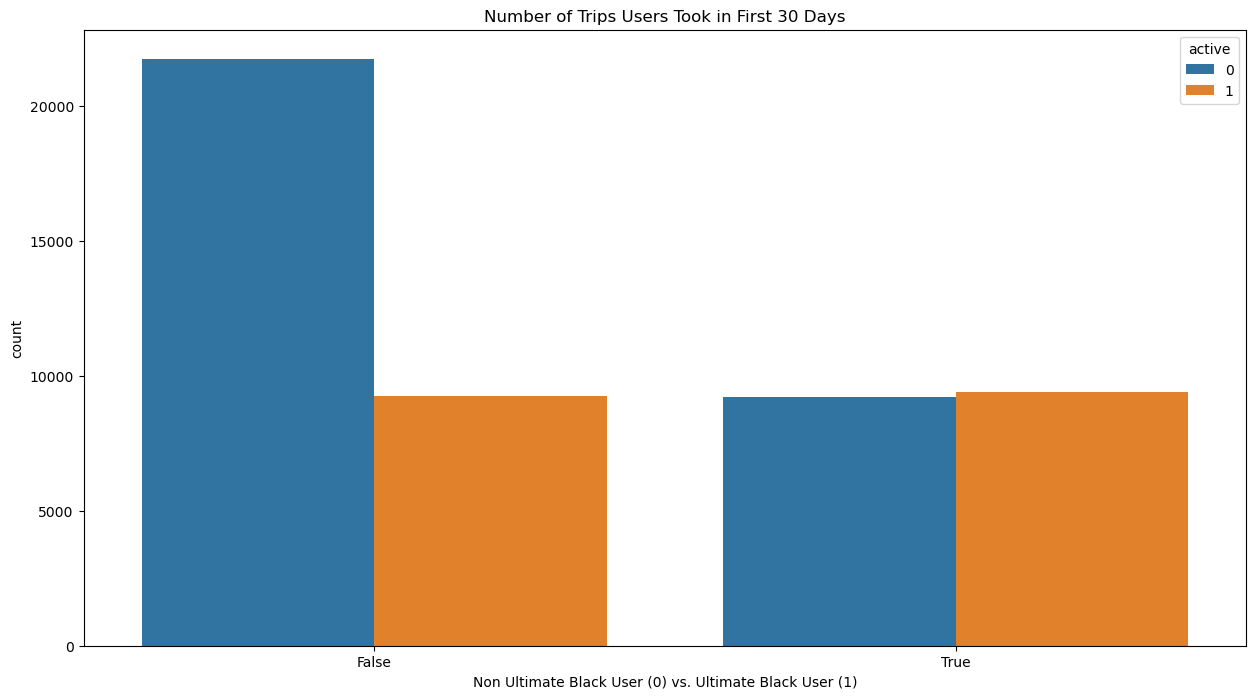

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='ultimate_black_user', data=df, hue='active')
plt.title('Number of Trips Users Took in First 30 Days')
plt.xlabel('Non Ultimate Black User (0) vs. Ultimate Black User (1)')
plt.show()

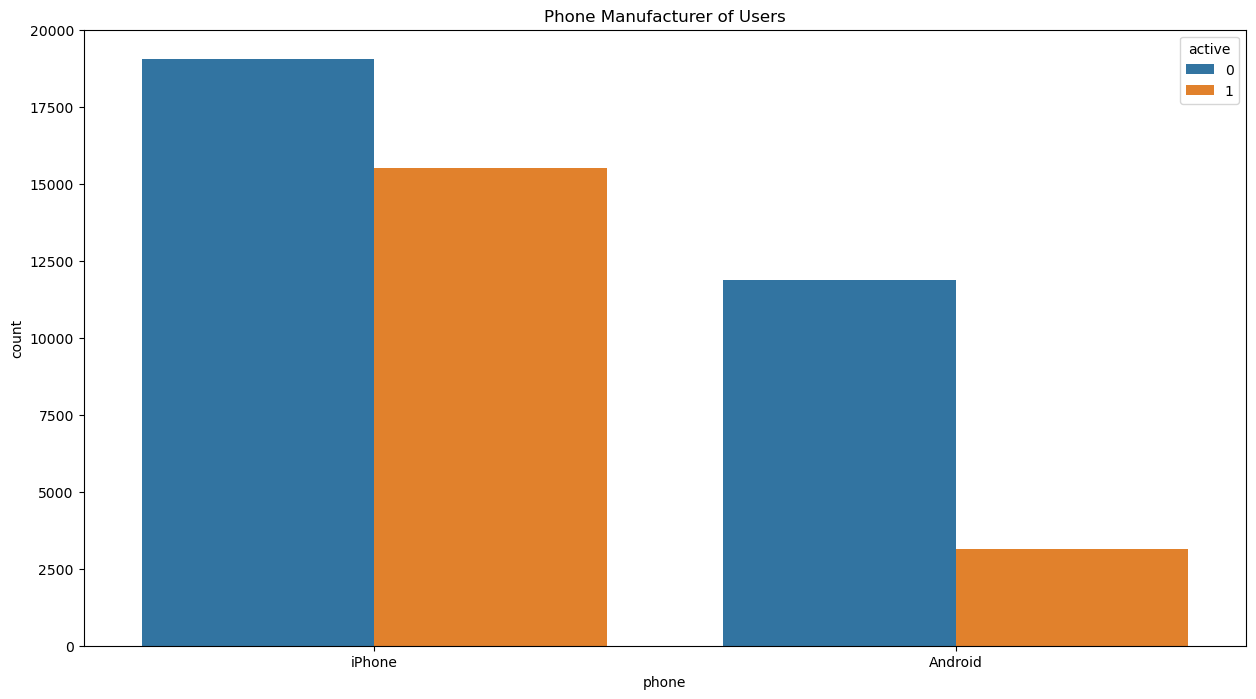

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='phone', data=df, hue='active')
plt.title('Phone Manufacturer of Users')
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_6928\556180398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWeekday['above_mean'] = dfWeekday['weekday_pct'].apply(lambda x: 1 if x > weekdayMean else 0)


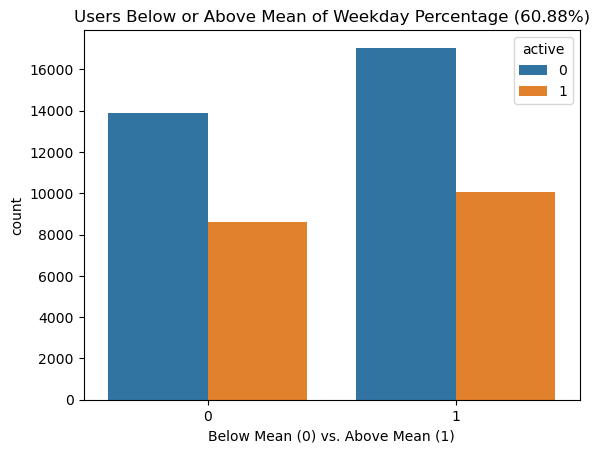

In [27]:
dfWeekday = df[['weekday_pct', 'active']]
weekdayMean = df['weekday_pct'].mean()
dfWeekday['above_mean'] = dfWeekday['weekday_pct'].apply(lambda x: 1 if x > weekdayMean else 0)
sns.countplot(x='above_mean', data=dfWeekday, hue='active')
plt.title('Users Below or Above Mean of Weekday Percentage (60.88%)')
plt.xlabel('Below Mean (0) vs. Above Mean (1)')
plt.show()

5.785418313039271


C:\Users\matth\AppData\Local\Temp\ipykernel_6928\1693058666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDist['above_mean'] = dfDist['avg_dist'].apply(lambda x: 1 if x > distMean else 0)


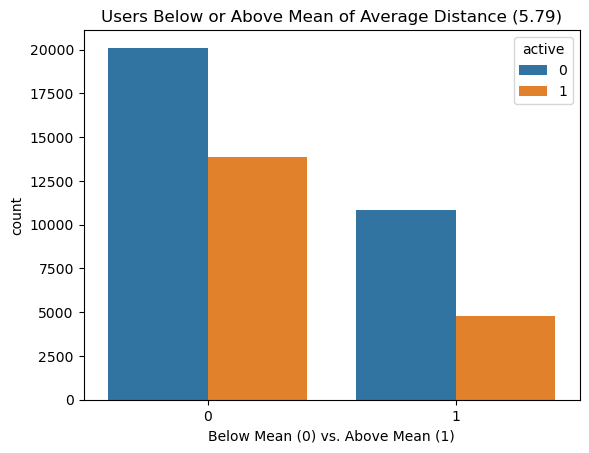

In [28]:
dfDist = df[['avg_dist', 'active']]
distMean = df['avg_dist'].mean()
dfDist['above_mean'] = dfDist['avg_dist'].apply(lambda x: 1 if x > distMean else 0)
sns.countplot(x='above_mean', data=dfDist, hue='active')
plt.title('Users Below or Above Mean of Average Distance (5.79)')
plt.xlabel('Below Mean (0) vs. Above Mean (1)')
plt.show()

We can see that a big visual indicator might be the amount of trips taken in the first 30 days. A user who took at least 4 has a higher chance of being an active user than non active 6 months later.

### Predictive Modeling

We need to setup our dataframe more to setup for a classifier in modeling.

In [29]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.601467,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


We will make our city and phone variable into a number column as well as drop our date columns.

In [30]:
df = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
#df['city'].replace(['King\'s Landing', 'Astapor', 'Winterfell'], [0, 1, 2], inplace=True)
#df['phone'].replace(['iPhone', 'Android'], [0,1], inplace=True)
df = df.drop(columns=['signup_date', 'last_trip_date'])
df

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.700000,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.000000,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.300000,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.600000,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.400000,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,100.0,5.63,4.2,1,0,1,0,0,1,1,0
49996,1,4.601467,1.00,0.0,0.0,0.00,4.0,0,1,0,0,0,1,1,0
49997,0,5.000000,1.00,0.0,100.0,3.86,5.0,0,0,0,1,1,0,0,1
49998,2,3.000000,1.00,0.0,100.0,4.58,3.5,0,1,0,0,0,1,1,0


In [31]:
from sklearn.model_selection import train_test_split

data = df.drop(columns=['active'], axis=1)
labels = df['active']
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

#train and test classifiers

# rf
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print('Random Forest Classifier score: ' + str(rf.score(X_test, y_test)))

# gbc
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
 
# Predict on test set
pred_y = gbc.predict(X_test)
 
# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Random Forest Classifier score: 0.7498236064912811
Gradient Boosting Classifier accuracy is : 0.78


In [33]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10)


In [34]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10)

rf.fit(X_train, y_train)

print('Random Forest Classifier score: ' + str(rf.score(X_test, y_test)))

Random Forest Classifier score: 0.7801632899909283


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6200
           1       0.73      0.65      0.69      3721

    accuracy                           0.78      9921
   macro avg       0.77      0.75      0.76      9921
weighted avg       0.78      0.78      0.78      9921

confusion matrix:
[[5313  887]
 [1294 2427]]


In [36]:
# RF
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

avg_rating_by_driver      0.149211
avg_dist                  0.147702
weekday_pct               0.137550
surge_pct                 0.106471
avg_surge                 0.079460
city_King's Landing       0.079405
trips_in_first_30_days    0.074170
avg_rating_of_driver      0.058758
phone_iPhone              0.036011
phone_Android             0.032121
Name: coef, dtype: float64

In [37]:
# GBC
feature_importance = pd.DataFrame()
feature_importance['coef'] = gbc.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

avg_rating_by_driver         0.245376
surge_pct                    0.174110
city_King's Landing          0.156899
weekday_pct                  0.156274
ultimate_black_user_False    0.049488
phone_iPhone                 0.049308
phone_Android                0.042798
trips_in_first_30_days       0.041680
city_Astapor                 0.027205
ultimate_black_user_True     0.023802
Name: coef, dtype: float64

After performing Random Forest Classifier with hypertuning as well as a Gradient Boosting Classifier, we can see that the average rating by the driver seems to be our most important factor when determing an active user. A way Ultimate can improve on this feature is to imporve on the service provided as a higher rating will lead to a more active user. The surge multipler also seemed to be a good factor as well so having increased surge multipliers might help retain members and keep them active.